**Aryan Zende**<h1 style='text-align:center;'>CODSOFT</h1> <h3 style='text-align:center;'>DATA SCIENCE</h3> <h4 style='text-align:center;'>Sales Prediction using Machine Learning</h4> <p style='text-align:center;'>Forecast product sales by analyzing advertising expenditures across various platforms. Using machine learning in Python, this project helps optimize advertising strategies to maximize sales potential.</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv(r"C:\Users\hp\Downloads\advertising.csv")

In [5]:
print(data.describe()) 

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [8]:
print(data.shape)

(200, 4)


In [11]:
print(data.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [13]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

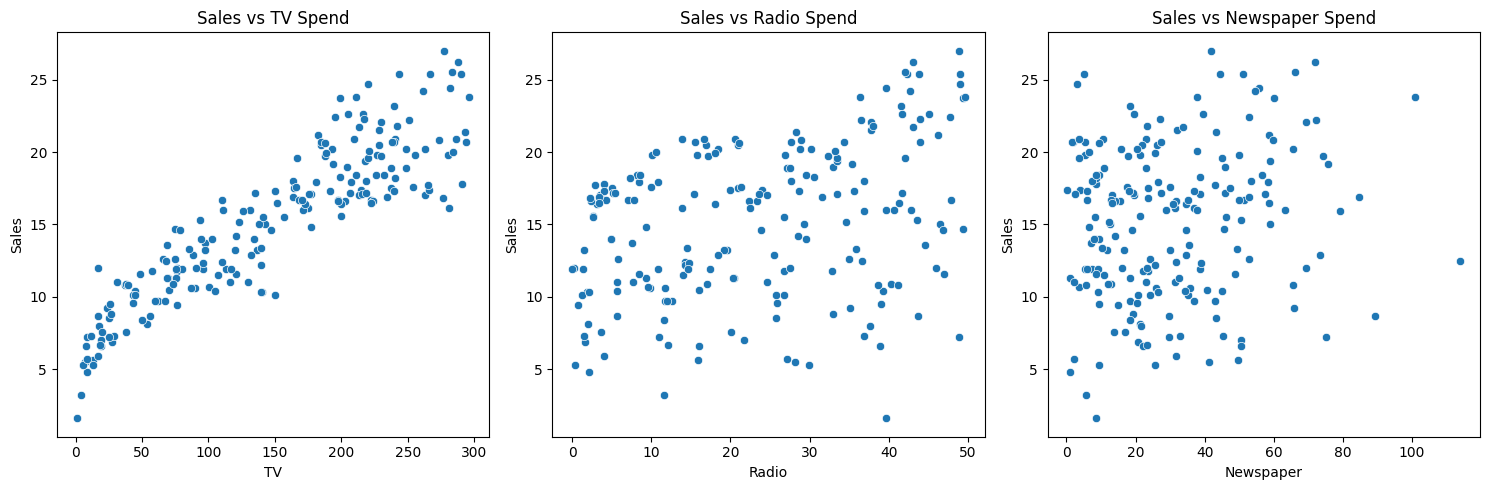

In [18]:
# Exploratory Data Analysis (EDA)
# Visualization of the relationship between spending and sales
plt.figure(figsize=(15, 5))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=data, x=col, y='Sales')
    plt.title(f'Sales vs {col} Spend')
plt.tight_layout()
plt.show()

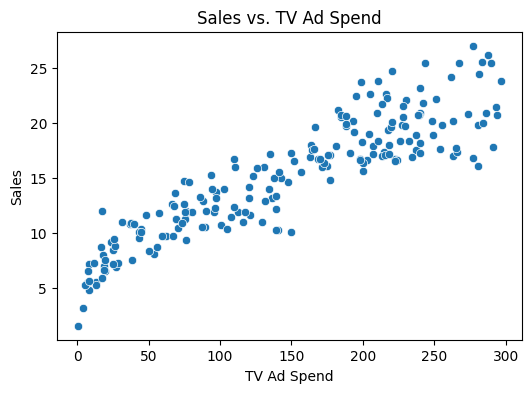

In [20]:
# 1. Scatter Plot - Relationship between Sales and TV Ad Spend
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='TV', y='Sales')
plt.title('Sales vs. TV Ad Spend')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.show()

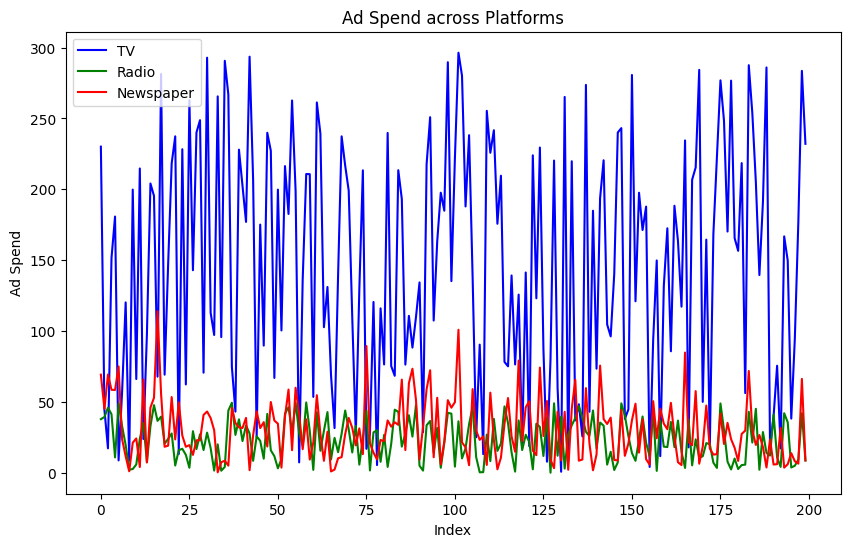

In [21]:
# 2. Line Plot - Trends of Ad Spend across different platforms
plt.figure(figsize=(10, 6))
plt.plot(data['TV'], label='TV', color='b')
plt.plot(data['Radio'], label='Radio', color='g')
plt.plot(data['Newspaper'], label='Newspaper', color='r')
plt.title('Ad Spend across Platforms')
plt.xlabel('Index')
plt.ylabel('Ad Spend')
plt.legend()
plt.show()

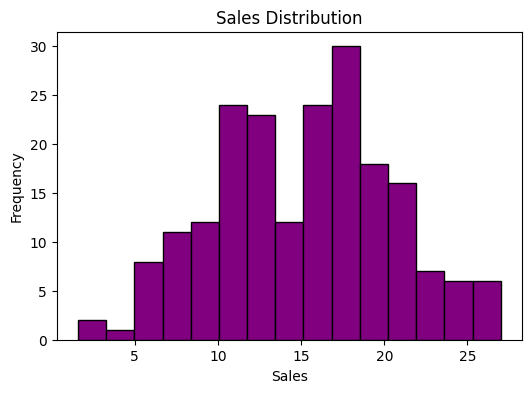

In [23]:

# 3. Histogram - Distribution of Sales
plt.figure(figsize=(6, 4))
plt.hist(data['Sales'], bins=15, color='purple', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

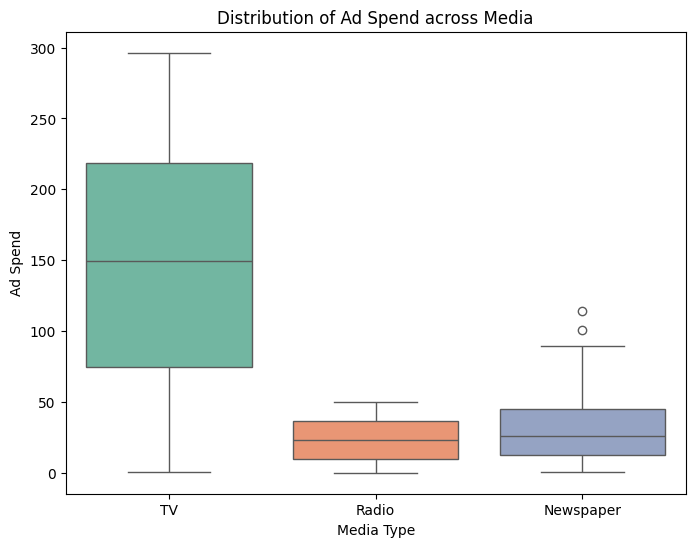

In [25]:
# 4. Box Plot - Distribution of Ad Spend across Media
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper']], palette="Set2")
plt.title('Distribution of Ad Spend across Media')
plt.xlabel('Media Type')
plt.ylabel('Ad Spend')
plt.show()

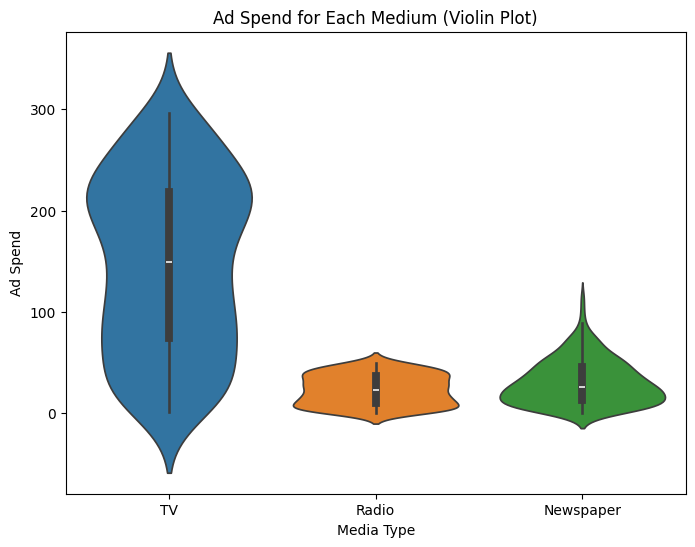

In [27]:
# 5. Violin Plot - Ad Spend for Each Medium
plt.figure(figsize=(8, 6))
sns.violinplot(data=data[['TV', 'Radio', 'Newspaper']])
plt.title('Ad Spend for Each Medium (Violin Plot)')
plt.xlabel('Media Type')
plt.ylabel('Ad Spend')
plt.show()

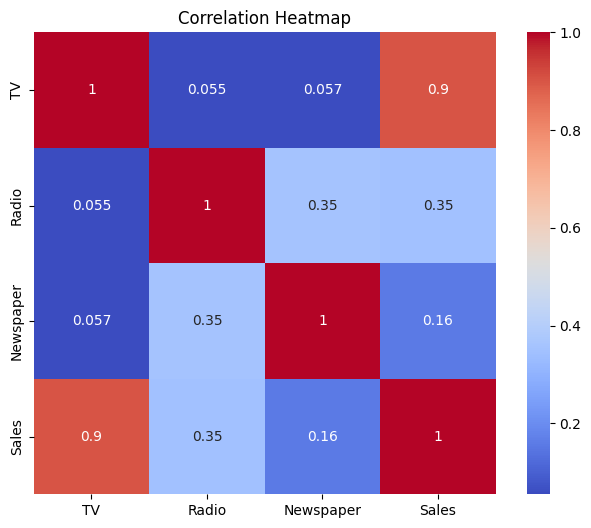

In [29]:
# 6. Correlation Heatmap - Correlation between Features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

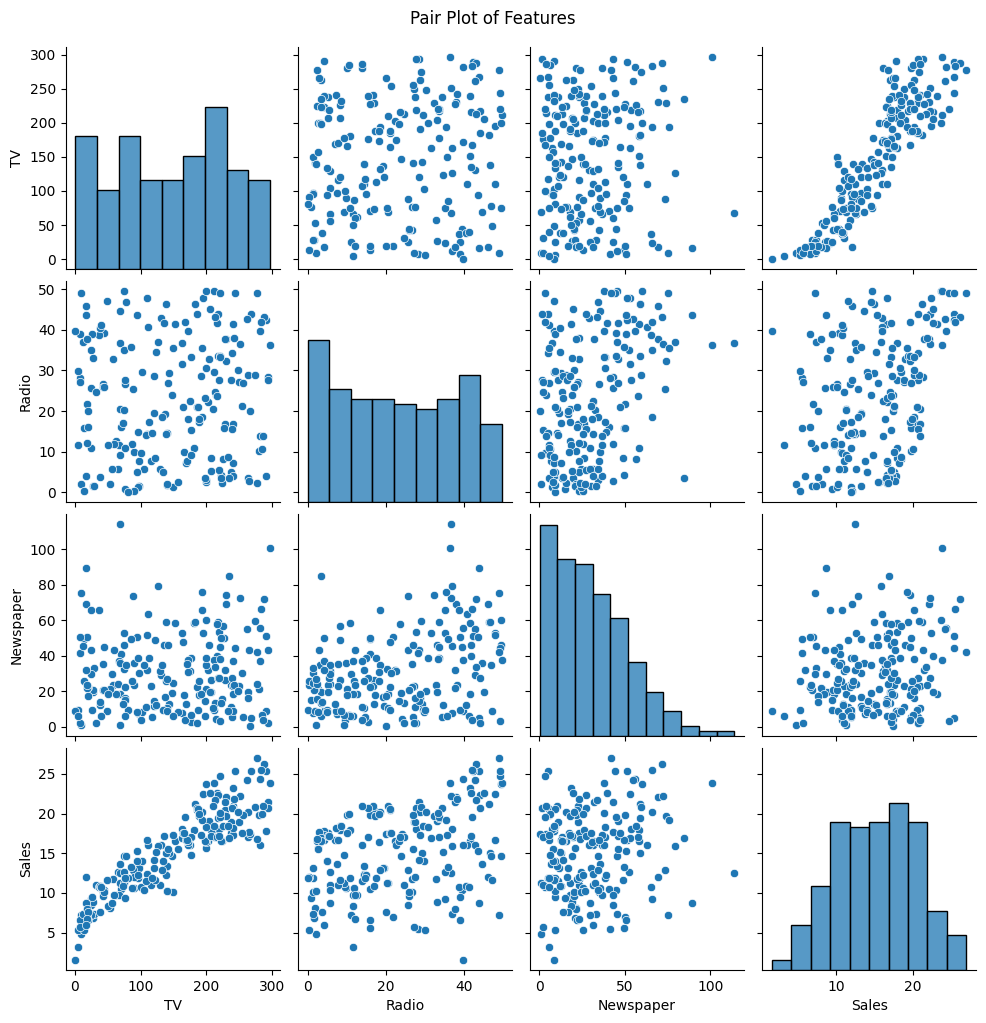

In [31]:
# 7. Pair Plot - Relationships between Features and Target
sns.pairplot(data)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3000\1734960505.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_tv_range = data.groupby('TV_Range')['Sales'].mean()


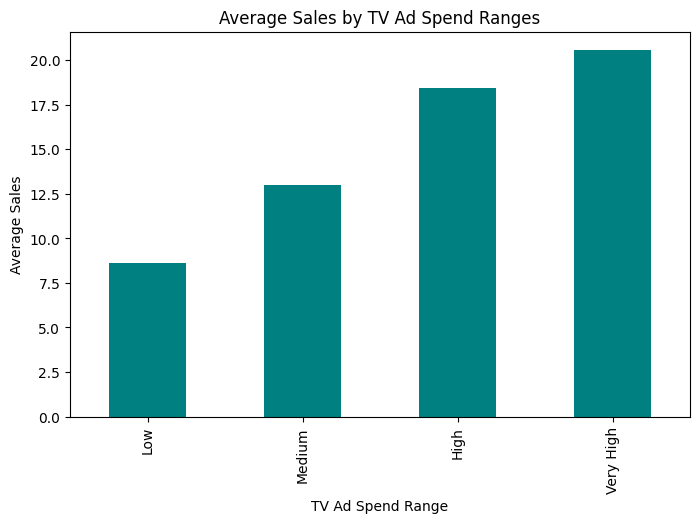

In [32]:
# 8. Bar Plot - Average Sales by Ranges of TV Ad Spend (Example Binning)
data['TV_Range'] = pd.cut(data['TV'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
avg_sales_by_tv_range = data.groupby('TV_Range')['Sales'].mean()
plt.figure(figsize=(8, 5))
avg_sales_by_tv_range.plot(kind='bar', color='teal')
plt.title('Average Sales by TV Ad Spend Ranges')
plt.xlabel('TV Ad Spend Range')
plt.ylabel('Average Sales')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3000\1720419152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='TV_Range', palette='muted')


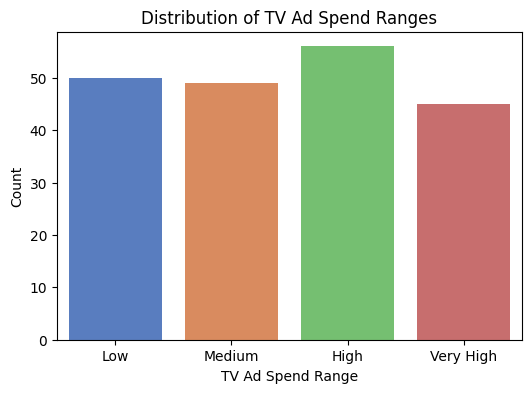

In [33]:
# 9. Count Plot - Distribution of TV Ad Spend Ranges
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='TV_Range', palette='muted')
plt.title('Distribution of TV Ad Spend Ranges')
plt.xlabel('TV Ad Spend Range')
plt.ylabel('Count')
plt.show()

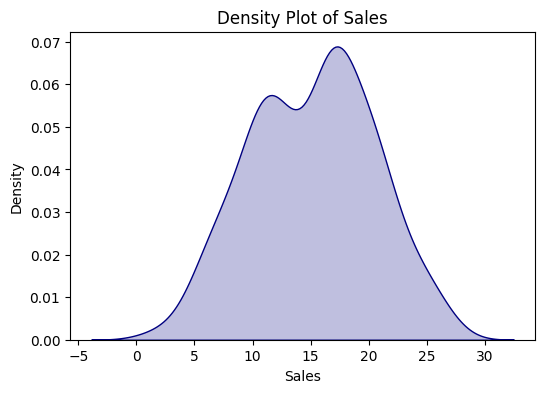

In [34]:
# 10. KDE Plot - Kernel Density Estimate of Sales
plt.figure(figsize=(6, 4))
sns.kdeplot(data['Sales'], fill=True, color='navy')
plt.title('Density Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

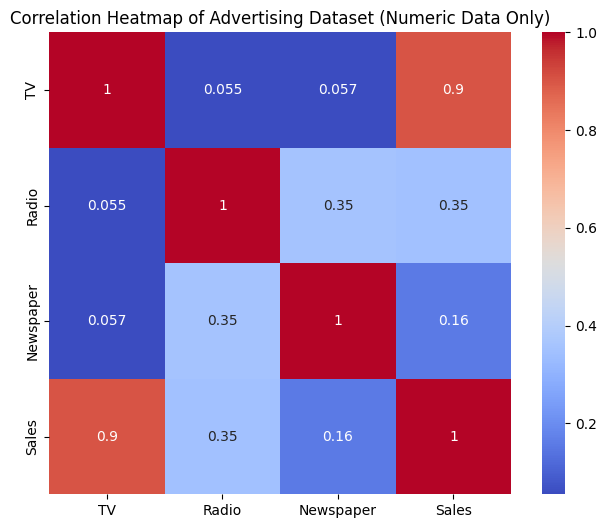

In [36]:
# Ensure only numeric columns are selected for the heatmap
numeric_data = data.select_dtypes(include=[float, int])

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Advertising Dataset (Numeric Data Only)')
plt.show()


In [37]:
# Define Features and Target Variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [38]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Scaling features (useful for models like Ridge, Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:

# Model Initialization
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [42]:
# Define parameter grids for tuning
param_grids = {
    "Ridge Regression": {"alpha": [0.1, 1, 10]},
    "Lasso Regression": {"alpha": [0.1, 0.5, 1]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
}


In [44]:
# Initialize dictionaries to store results
results = {}

In [45]:
# Train and evaluate each model with hyperparameter tuning
for name, model in models.items():
    if name in param_grids:  # Perform hyperparameter tuning if grid is defined
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
        grid_search.fit(X_train_scaled if name in ["Ridge Regression", "Lasso Regression"] else X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"{name} Best Parameters: {grid_search.best_params_}")
    else:  # For models without hyperparameter tuning
        best_model = model.fit(X_train, y_train)

Ridge Regression Best Parameters: {'alpha': 0.1}
Lasso Regression Best Parameters: {'alpha': 0.1}
Decision Tree Best Parameters: {'max_depth': None}
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [46]:

# Train and evaluate each model with hyperparameter tuning
for name, model in models.items():
    if name in param_grids:  # Perform hyperparameter tuning if grid is defined
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
        grid_search.fit(X_train_scaled if name in ["Ridge Regression", "Lasso Regression"] else X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"{name} Best Parameters: {grid_search.best_params_}")
    else:  # For models without hyperparameter tuning
        best_model = model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = best_model.predict(X_test_scaled if name in ["Ridge Regression", "Lasso Regression"] else X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")


Linear Regression Performance:
Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R-squared (R2): 0.9059011844150826
Ridge Regression Best Parameters: {'alpha': 0.1}

Ridge Regression Performance:
Mean Absolute Error (MAE): 1.2746881366626583
Mean Squared Error (MSE): 2.908428668954266
Root Mean Squared Error (RMSE): 1.705411583446725
R-squared (R2): 0.9058794454257529
Lasso Regression Best Parameters: {'alpha': 0.1}

Lasso Regression Performance:
Mean Absolute Error (MAE): 1.2701391672861768
Mean Squared Error (MSE): 2.930148052297701
Root Mean Squared Error (RMSE): 1.7117675228539946
R-squared (R2): 0.905176577782095
Decision Tree Best Parameters: {'max_depth': None}

Decision Tree Performance:
Mean Absolute Error (MAE): 1.24
Mean Squared Error (MSE): 3.4019999999999997
Root Mean Squared Error (RMSE): 1.8444511378727275
R-squared (R2): 0.8899068317956319
Random Forest Best Parameters: {'max_de

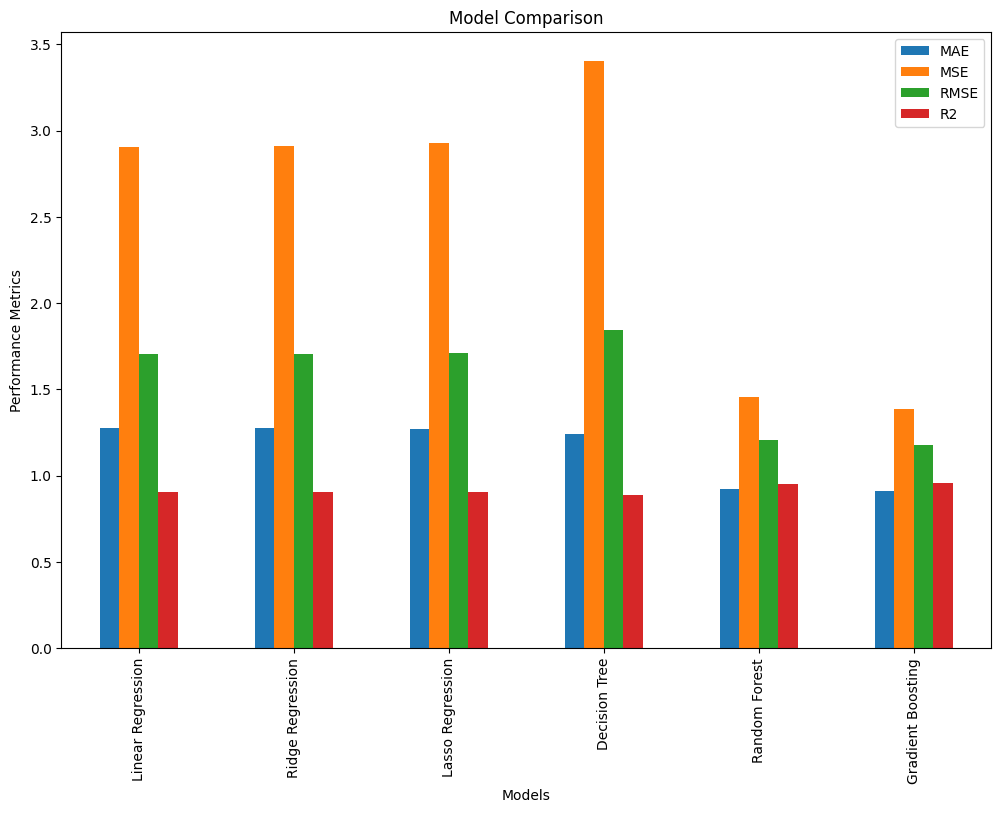

In [47]:
# Visualizing model comparison
results_df = pd.DataFrame(results).T
results_df.plot(kind="bar", figsize=(12, 8))
plt.title("Model Comparison")
plt.xlabel("Models")
plt.ylabel("Performance Metrics")
plt.show()

In [53]:

# Ensure each model in the dictionary is fitted
for model_name, model in models.items():
    model.fit(X_train_scaled if model_name in ["Ridge Regression", "Lasso Regression"] else X_train, y_train)



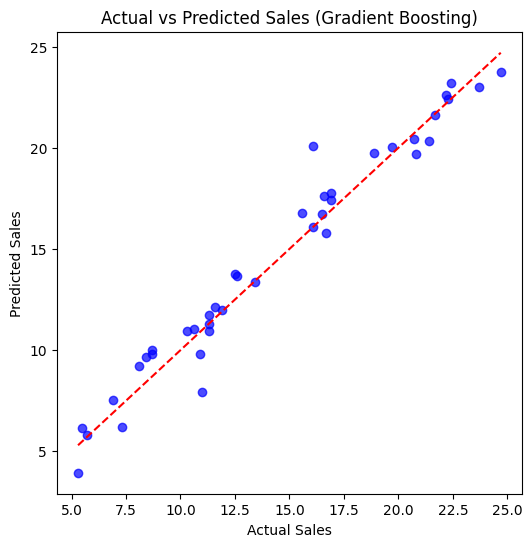

In [54]:
# Get predictions with the best model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
y_pred_final = best_model.predict(X_test_scaled if best_model_name in ["Ridge Regression", "Lasso Regression"] else X_test)

# Plotting Actual vs Predicted for the best model
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_final, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales ({best_model_name})')
plt.show()